In [1]:
import pandas as pd

datos = pd.read_csv("U4_01_housing.csv")

In [2]:
datos.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
datos["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

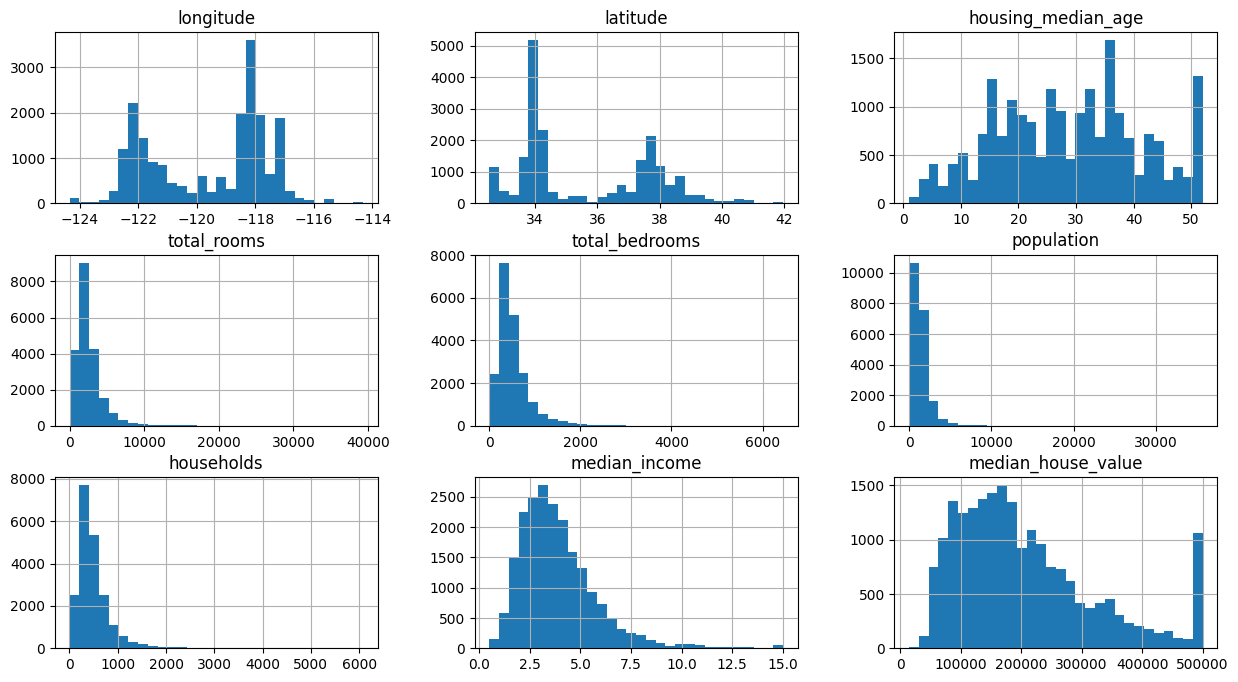

In [6]:
datos.hist(figsize=(15,8), bins=30)

TypeError: cannot convert the series to <class 'float'>

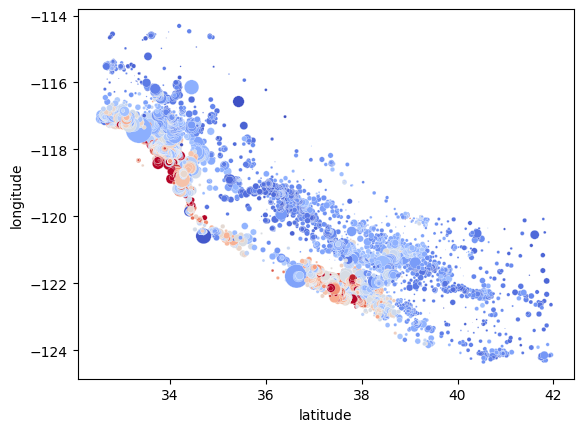

In [7]:
import seaborn as sb

sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value", palette="coolwarm", 
               s=datos["population"]/100)

<Axes: xlabel='latitude', ylabel='longitude'>

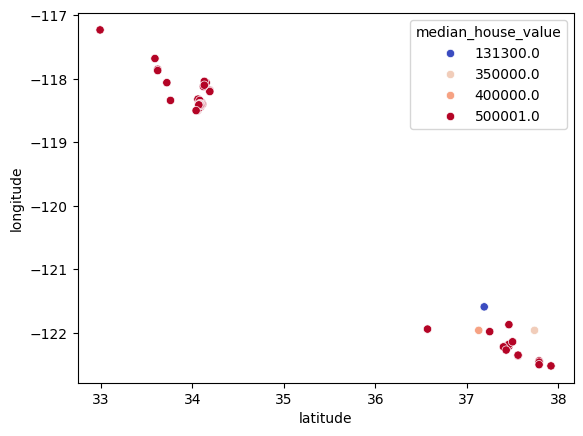

In [9]:
sb.scatterplot(x="latitude", y="longitude", data=datos[(datos.median_income > 14)], hue="median_house_value", palette="coolwarm")

In [10]:
#eliminar nulos
datos_na = datos.dropna()
datos_na.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [11]:
datos_na["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [17]:
#generar columnas dummis para columna no entera
dummies = pd.get_dummies(datos["ocean_proximity"], dtype=int)


In [18]:
datos_na = datos_na.join(dummies)


In [19]:
#eliminar columna
datos_na = datos_na.drop(["ocean_proximity"], axis=1)
datos_na.head()

KeyError: "['ocean_proximity'] not found in axis"

In [20]:
datos_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

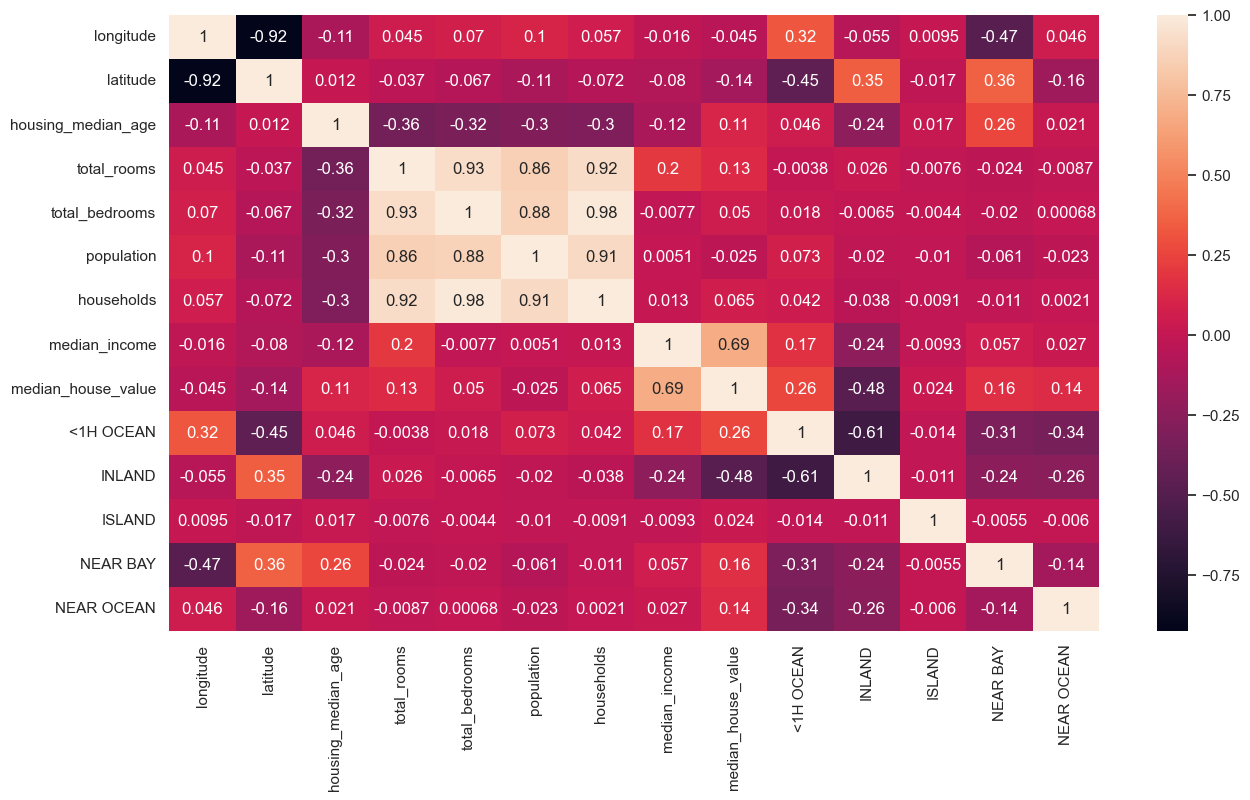

In [21]:
sb.set(rc={"figure.figsize": (15,8)})
sb.heatmap(datos_na.corr(), annot=True)

In [23]:
#encontrar correlaciones
datos_na.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

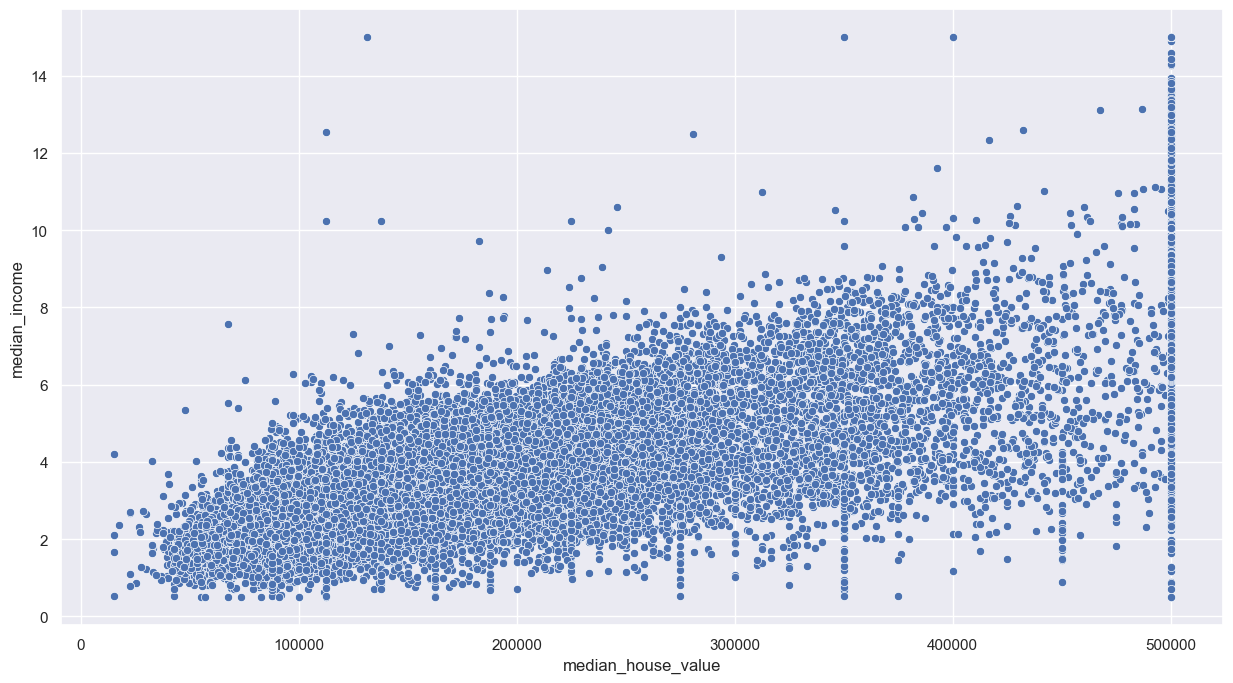

In [24]:
sb.scatterplot(x=datos_na["median_house_value"], y=datos_na["median_income"])

In [25]:
datos_na["bedrooms_ratio"] = datos_na["total_bedrooms"] / datos_na["total_rooms"]

<Axes: >

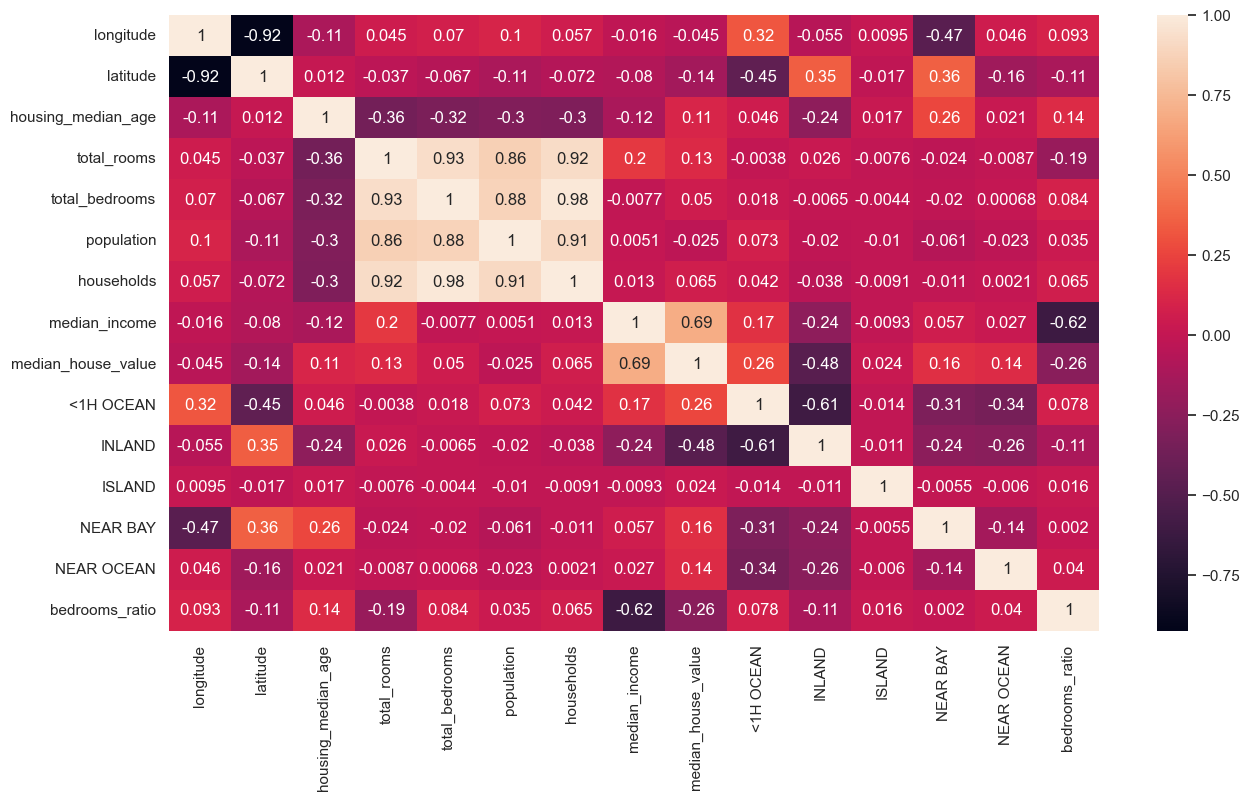

In [26]:
sb.set(rc={"figure.figsize": (15,8)})
sb.heatmap(datos_na.corr(), annot=True)


In [28]:
X = datos_na.drop(["median_house_value"],axis=1)
Y = datos_na["median_house_value"]

In [29]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, Y_ent, Y_pru = train_test_split(X, Y, test_size=0.2)

In [33]:
Y_pru.shape

(4087,)

In [34]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(X_ent, Y_ent)

LinearRegression()

In [35]:
predicciones = modelo.predict(X_pru)

In [36]:
comparativa = { "Predicciones": predicciones, "Valor real": Y_pru}
pd.DataFrame(comparativa)

,Predicciones,Valor real
10984,181181.012040,146500.0
12055,108908.423363,110600.0
6623,233648.223742,175000.0
17512,286676.577567,391300.0
16946,331381.906364,500001.0
...,...,...
4196,184656.115769,187100.0
12709,104445.704894,108100.0
15749,259282.423552,350000.0
10959,173351.884237,163000.0


In [39]:
# score ????
#overfitting sobreajuste
print(modelo.score(X_ent, Y_ent))
print(modelo.score(X_pru, Y_pru))


0.6529653631979057
0.6457626421578887


In [41]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_pru, predicciones)
mse

4708257246.638098

In [42]:
import numpy as np

rmse = np.sqrt(mse)
rmse

68616.7417372619

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_ent_esc = scaler.fit_transform(X_ent)
x_pru_esc = scaler.fit_transform(X_pru)

In [45]:
X_ent

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedrooms_ratio
10298,-117.85,33.92,11.0,3331.0,410.0,1460.0,416.0,8.0287,1,0,0,0,0,0.123086
15460,-117.29,33.15,11.0,2560.0,445.0,952.0,448.0,4.0625,0,0,0,0,1,0.173828
7375,-118.22,33.97,47.0,1058.0,295.0,1097.0,274.0,2.8810,1,0,0,0,0,0.278828
11309,-117.96,33.78,26.0,2136.0,557.0,1528.0,537.0,2.4931,1,0,0,0,0,0.260768
17693,-121.81,37.28,17.0,2277.0,428.0,1887.0,422.0,5.7078,1,0,0,0,0,0.187967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,-118.09,33.76,26.0,1625.0,440.0,533.0,414.0,1.8080,1,0,0,0,0,0.270769
1773,-122.34,37.94,47.0,2313.0,433.0,947.0,430.0,3.9420,0,0,0,1,0,0.187203
5485,-118.46,33.99,35.0,1214.0,300.0,478.0,265.0,4.0156,1,0,0,0,0,0.247117
10648,-117.78,33.54,29.0,1421.0,462.0,520.0,339.0,2.2969,1,0,0,0,0,0.325123


In [46]:
pd.DataFrame(x_ent_esc)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.860317,-0.804169,-1.406251,0.327773,-0.300589,0.034711,-0.215891,2.195219,1.123018,-0.678895,-0.013549,-0.354295,-0.387498,-1.538635
1,1.139230,-1.164926,-1.406251,-0.029187,-0.217345,-0.422650,-0.132113,0.097204,-0.890457,-0.678895,-0.013549,-0.354295,2.580658,-0.672689
2,0.676036,-0.780743,1.457010,-0.724586,-0.574105,-0.292104,-0.587655,-0.527778,1.123018,-0.678895,-0.013549,-0.354295,-0.387498,1.119206
3,0.805531,-0.869761,-0.213226,-0.225491,0.049036,0.095933,0.100893,-0.732967,1.123018,-0.678895,-0.013549,-0.354295,-0.387498,0.810996
4,-1.111990,0.770042,-0.929041,-0.160211,-0.257777,0.419147,-0.200183,0.967524,1.123018,-0.678895,-0.013549,-0.354295,-0.387498,-0.431405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,0.740784,-0.879131,-0.213226,-0.462075,-0.229237,-0.799883,-0.221127,-1.095366,1.123018,-0.678895,-0.013549,-0.354295,-0.387498,0.981678
16342,-1.375960,1.079262,1.457010,-0.143543,-0.245885,-0.427151,-0.179238,0.033463,-0.890457,-0.678895,-0.013549,2.822506,-0.387498,-0.444441
16343,0.556502,-0.771373,0.502590,-0.652361,-0.562213,-0.849400,-0.611218,0.072396,1.123018,-0.678895,-0.013549,-0.354295,-0.387498,0.578036
16344,0.895181,-0.982205,0.025380,-0.556524,-0.176912,-0.811587,-0.417482,-0.836751,1.123018,-0.678895,-0.013549,-0.354295,-0.387498,1.909265
